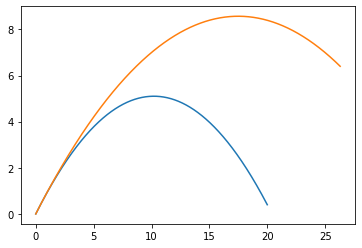

In [6]:
import matplotlib.pyplot as pp
import numpy as np

MODEL_G = 9.81
MODEL_DT = 0.001
MODEL_DM = 0.1     
MODEL_U = 20       

class Body:
    def __init__(self, x, y, vx, vy):

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

        self.trajectory_x = []
        self.trajectory_y = []

    def advance(self):

        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)

        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

class Rocket(Body):
    def __init__(self, x, y):
        super().__init__(x, y, 10, 10)
        self.m = 50               #Масса всей ракеты 

    def advance(self):
        super().advance()
        if self.m >= 40:          #Масса корпуса ракеты
            self.m -= MODEL_DM
            v = (self.vx ** 2 + self.vy ** 2) ** 0.5
            
            dv = MODEL_U * MODEL_DM / self.m     #Формулу мы вывели через ЗСЭ   
            self.vx += dv * self.vx / v            
            self.vy += dv * self.vy / v

b = Body(0, 0, 10, 10)
r = Rocket(0, 0)

bodies = [b, r]

for t in np.r_[0:2:MODEL_DT]:
    for b in bodies:
        b.advance()

for b in bodies:
     pp.plot(b.trajectory_x, b.trajectory_y) 
pp.show()